In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New section

In [ ]:



# File path for the Excel file
file_path = '/content/Combined_Polymer_Dataset__murari_singh.xlsx'

# Read the first few lines of the Excel file
data = pd.read_excel(file_path)
print("First few rows of the data:")
print(data.head())  # Displays the first 5 rows



First few rows of the data:
   density of polymer(g/cm^3)  Young's modulus of matrix(Mpa)  \
0                    2.304356                     2077.588231   
1                    2.351494                     2863.382350   
2                    1.216185                     2655.495233   
3                    2.698723                     1336.067030   
4                    2.967770                     1536.683900   

   Tensile strength of matrix(Mpa)  CNT weight fraction(%)  \
0                        42.429664               18.132044   
1                        47.196380               16.417135   
2                       125.520988                9.143659   
3                        70.082664                9.202519   
4                       117.870240                2.638341   

   CNT density(g/cm^3)  CNT average dia(nm)  CNT average length(nm)  \
0             1.645083            43.521651            44802.782685   
1             1.412909            90.816735            28477.25887

In [ ]:
missing_values = data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
density of polymer(g/cm^3)                      0
Young's modulus of matrix(Mpa)                  0
Tensile strength of matrix(Mpa)                 0
CNT weight fraction(%)                          0
CNT density(g/cm^3)                             0
CNT average dia(nm)                             0
CNT average length(nm)                          0
Young's modulus of CNTs(Gpa)                    0
Polymer_matrix                                  0
Processing_method                               0
CNT_surface_modification_method                 0
Tensile strength of the nano-composites(Mpa)    0
dtype: int64



Summary Statistics:
       density of polymer(g/cm^3)  Young's modulus of matrix(Mpa)  \
count                   96.000000                       96.000000   
mean                     2.078116                     1624.163301   
std                      0.746948                      842.072512   
min                      0.862443                       57.014670   
25%                      1.395378                      906.181258   
50%                      2.079322                     1763.220749   
75%                      2.620776                     2237.589305   
max                      3.469191                     3061.466363   

       Tensile strength of matrix(Mpa)  CNT weight fraction(%)  \
count                        96.000000               96.000000   
mean                         69.539792                9.554851   
std                          41.110958                5.730475   
min                           2.270490                0.238435   
25%                        

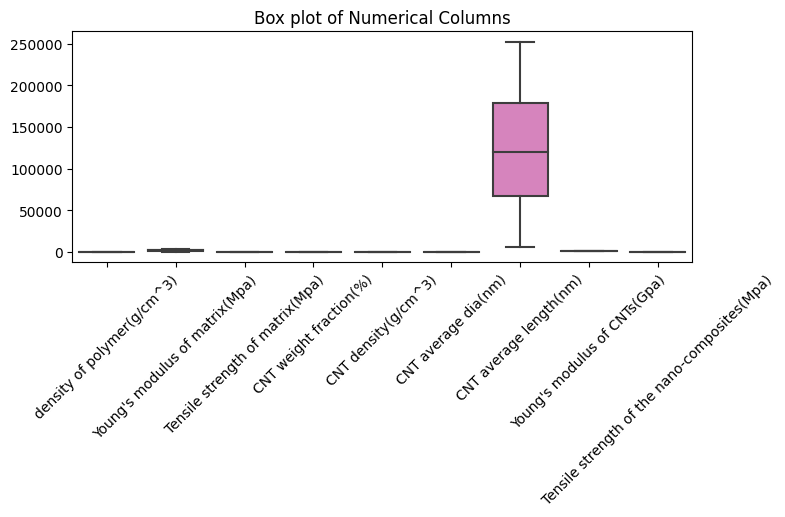

In [ ]:
# Summary statistics of the data
print("\nSummary Statistics:")
print(data.describe())

# Creating box plots for all numerical columns
plt.figure(figsize=(8, 3))
sns.boxplot(data=data.select_dtypes(include=['float64', 'int64']))
plt.xticks(rotation=45)
plt.title('Box plot of Numerical Columns')
plt.show()

In [ ]:
import numpy as np
dataset = data.to_numpy()
print(dataset.shape)

(96, 12)


In [ ]:
X = data.drop('Tensile strength of the nano-composites(Mpa)', axis=1)  # Input features
Y = data['Tensile strength of the nano-composites(Mpa)']  # Target variable

In [ ]:
print(X.shape)
print(Y.shape)
print(Y[:5])

(96, 11)
(96,)
0      8.126636
1    151.274595
2     64.893101
3     20.861076
4      0.653433
Name: Tensile strength of the nano-composites(Mpa), dtype: float64


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [ ]:
# Separating numerical and categorical columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Normalizing the numerical columns
scaler = StandardScaler()
X_normalized = X.copy()
X_normalized[numerical_cols] = scaler.fit_transform(X[numerical_cols])


First few rows of the normalized data:
   density of polymer(g/cm^3)  Young's modulus of matrix(Mpa)  \
0                    0.304475                        0.541290   
1                    0.367914                        1.479355   
2                   -1.159994                        1.231184   
3                    0.835217                       -0.343924   
4                    1.197304                       -0.104431   

   Tensile strength of matrix(Mpa)  CNT weight fraction(%)  \
0                        -0.662900                1.504625   
1                        -0.546343                1.203793   
2                         1.368858               -0.072132   
3                         0.013274               -0.061807   
4                         1.181781               -1.213305   

   CNT density(g/cm^3)  CNT average dia(nm)  CNT average length(nm)  \
0            -0.327648            -0.624395               -1.121675   
1            -1.227673             0.644052            

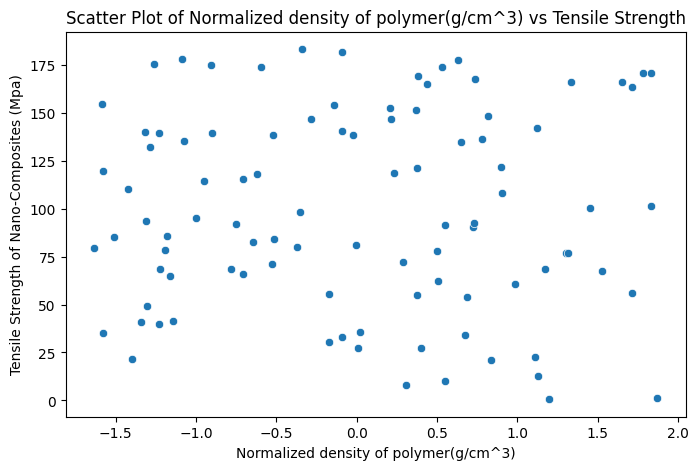

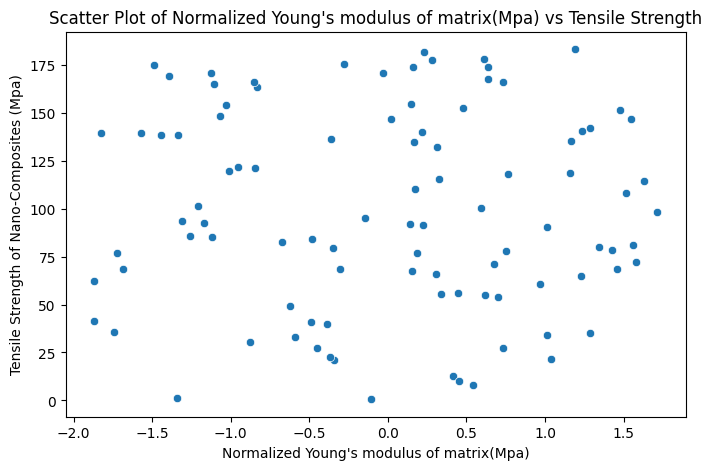

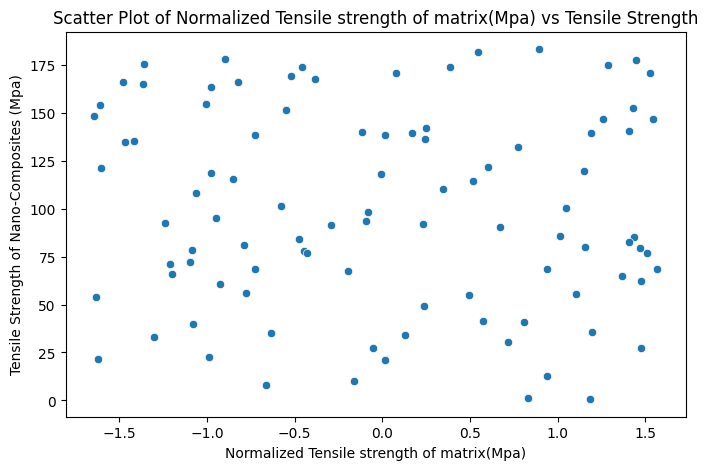

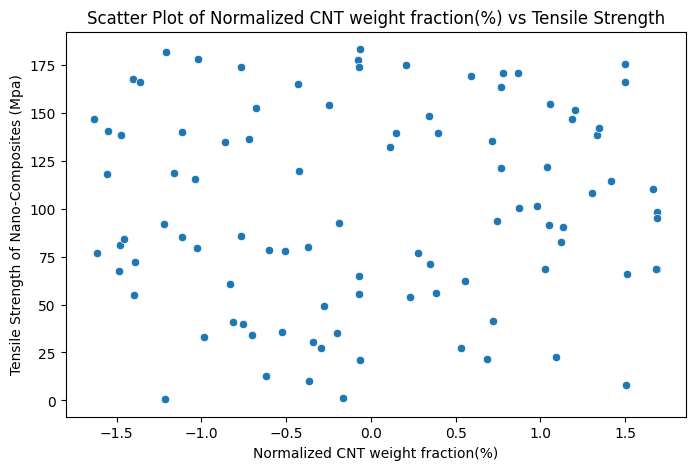

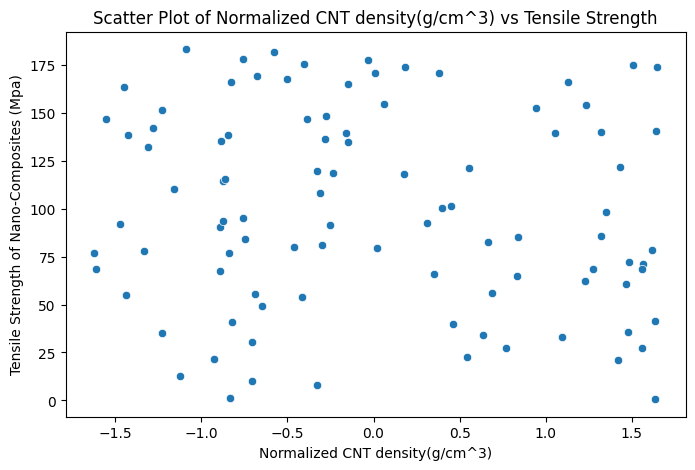

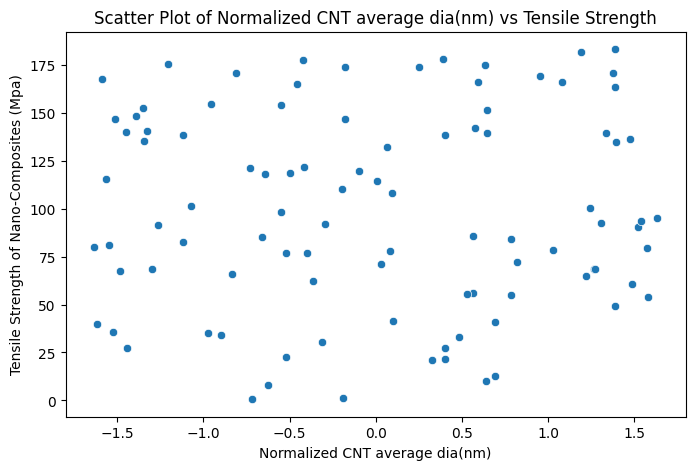

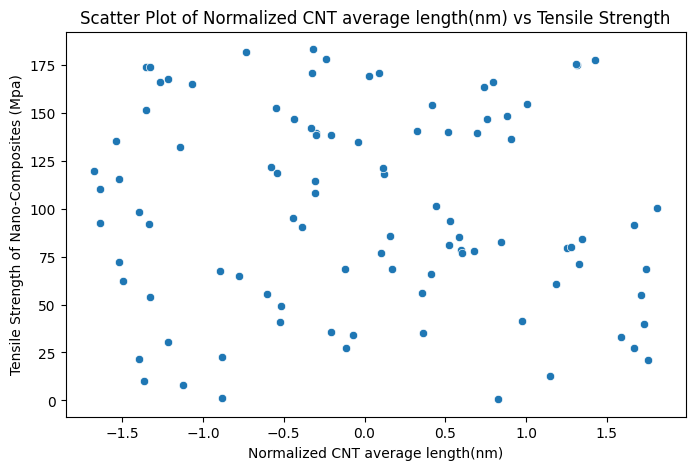

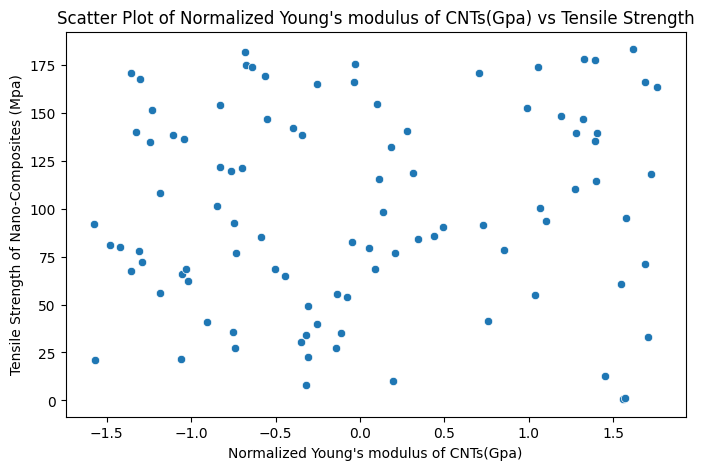

In [ ]:
print("First few rows of the normalized data:")
print(X_normalized.head())
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Assuming 'X' and 'Y' are already defined as your features and target variable

# Separating numerical and categorical columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Normalizing the numerical columns
scaler = StandardScaler()
X_normalized = X.copy()
X_normalized[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Creating scatter plots of the normalized numerical features against the target variable
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=X_normalized[col], y=Y)
    plt.xlabel(f'Normalized {col}')
    plt.ylabel('Tensile Strength of Nano-Composites (Mpa)')
    plt.title(f'Scatter Plot of Normalized {col} vs Tensile Strength')
    plt.show()


In [ ]:
# One-hot encoding the categorical variables
X_encoded = pd.get_dummies(data, columns=categorical_cols)

# Displaying the first few rows of the dataset after encoding
print("First few rows of the dataset after one-hot encoding:")
print(X_encoded.head())


First few rows of the dataset after one-hot encoding:
   density of polymer(g/cm^3)  Young's modulus of matrix(Mpa)  \
0                    2.304356                     2077.588231   
1                    2.351494                     2863.382350   
2                    1.216185                     2655.495233   
3                    2.698723                     1336.067030   
4                    2.967770                     1536.683900   

   Tensile strength of matrix(Mpa)  CNT weight fraction(%)  \
0                        42.429664               18.132044   
1                        47.196380               16.417135   
2                       125.520988                9.143659   
3                        70.082664                9.202519   
4                       117.870240                2.638341   

   CNT density(g/cm^3)  CNT average dia(nm)  CNT average length(nm)  \
0             1.645083            43.521651            44802.782685   
1             1.412909            90.816

In [ ]:
from sklearn.model_selection import train_test_split


X = X_encoded
Y = data['Tensile strength of the nano-composites(Mpa)']

# Splitting the dataset into training and development sets
X_train, X_dev, Y_train, Y_dev = train_test_split(X, Y, test_size=0.2, random_state=42)

# X_train and Y_train are the training set
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming X_encoded is already defined and contains the input features after encoding
# and Y contains the target variable

# Splitting the dataset into training and development sets
X_train, X_dev, Y_train, Y_dev = train_test_split(X_encoded, Y, test_size=0.2, random_state=42)

# Creating the Random Forest Regressor model
random_forest_model = RandomForestRegressor(random_state=42)

# Training the model on the training data
random_forest_model.fit(X_train, Y_train)

# Predicting on the training set to evaluate the performance
Y_train_pred = random_forest_model.predict(X_train)

# Calculating performance metrics on the training set
mse_train = mean_squared_error(Y_train, Y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(Y_train, Y_train_pred)
std_train = np.std(Y_train - Y_train_pred)

# Printing the performance metrics for the training set
print("Model Performance on the Training Set:")
print(f"Mean Squared Error (MSE): {mse_train:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.4f}")
print(f"R-squared (R²): {r2_train:.4f}")
print(f"Standard Deviation of Residuals: {std_train:.4f}")












Model Performance on the Training Set:
Mean Squared Error (MSE): 1.4926
Root Mean Squared Error (RMSE): 1.2217
R-squared (R²): 0.9994
Standard Deviation of Residuals: 1.2173


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Creating the Random Forest Regressor model
random_forest_model = RandomForestRegressor(random_state=42)

# Training the model on the training data
random_forest_model.fit(X_train, Y_train)

# Predicting on the development set
Y_dev_pred = random_forest_model.predict(X_dev)

# Evaluating the model
mse = mean_squared_error(Y_dev, Y_dev_pred)
rmse = np.sqrt(mse)  # Calculating the Root Mean Squared Error
r2 = r2_score(Y_dev, Y_dev_pred)
std_residuals = np.std(Y_dev - Y_dev_pred)  # Calculating the Standard Deviation of Residuals

# Printing the performance metrics
print("Model Performance on the Development Set:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")
print(f"Standard Deviation of Residuals: {std_residuals:.4f}")


Model Performance on the Development Set:
Mean Squared Error (MSE): 23.6543
Root Mean Squared Error (RMSE): 4.8636
R-squared (R²): 0.9923
Standard Deviation of Residuals: 4.4963


Model Performance on the Development Set:
Mean Squared Error: 23.654280061577015
R-squared: 0.9923401407919821


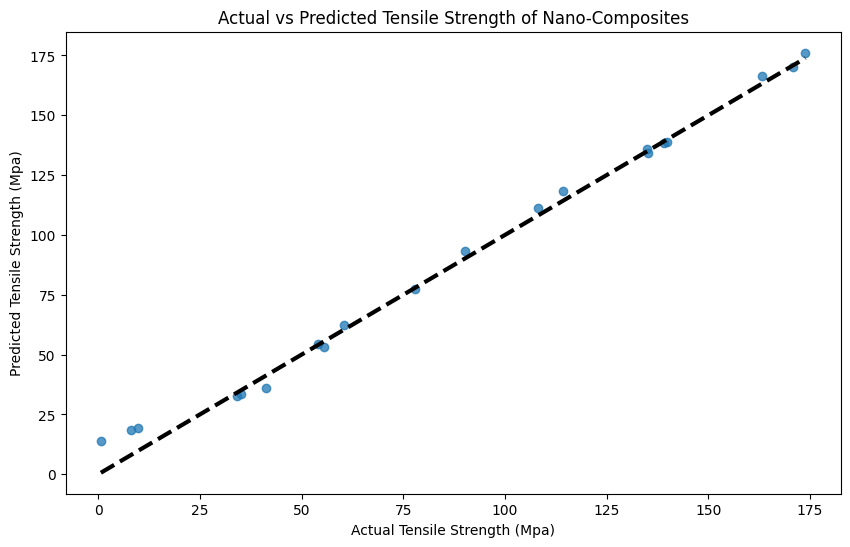

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Creating the Random Forest Regressor model
random_forest_model = RandomForestRegressor(random_state=42)

# Training the model on the training data
random_forest_model.fit(X_train, Y_train)

# Predicting on the development set
Y_dev_pred = random_forest_model.predict(X_dev)

# Evaluating the model
mse = mean_squared_error(Y_dev, Y_dev_pred)
r2 = r2_score(Y_dev, Y_dev_pred)

print("Model Performance on the Development Set:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(Y_dev, Y_dev_pred, alpha=0.75)
plt.plot([Y_dev.min(), Y_dev.max()], [Y_dev.min(), Y_dev.max()], 'k--', lw=3)  # Diagonal line
plt.xlabel('Actual Tensile Strength (Mpa)')
plt.ylabel('Predicted Tensile Strength (Mpa)')
plt.title('Actual vs Predicted Tensile Strength of Nano-Composites')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Creating the Random Forest Regressor model
random_forest_model = RandomForestRegressor(random_state=42)

# Applying k-fold cross-validation (let's use k=5)
k = 5
cv_scores = cross_val_score(random_forest_model, X, Y, cv=k, scoring='neg_mean_squared_error')

# Converting the scores to positive values (as they are returned as negative by convention)
cv_scores = np.abs(cv_scores)

# Calculating mean and standard deviation of the scores
mean_cv_scores = np.mean(cv_scores)
std_cv_scores = np.std(cv_scores)

print(f"Cross-Validation Scores (MSE) for {k} folds: {cv_scores}")
print(f"Mean CV MSE: {mean_cv_scores}")
print(f"Standard Deviation of CV MSE: {std_cv_scores}")


Cross-Validation Scores (MSE) for 5 folds: [29.79966164 12.91104918 11.94297347  3.42427634  5.5295586 ]
Mean CV MSE: 12.721503846493459
Standard Deviation of CV MSE: 9.278663982158818


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Creating and fitting the Random Forest Regressor model
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, Y_train)

# Now the model is fitted, you can make predictions
Y_dev_pred = random_forest_model.predict(X_dev)

# Calculating regression metrics
mse = mean_squared_error(Y_dev, Y_dev_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_dev, Y_dev_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 23.654280061577015
Root Mean Squared Error (RMSE): 4.863566598863124
R-squared (R²): 0.9923401407919821


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/Combined_Polymer_Dataset__murari_singh.xlsx'
data = pd.read_excel(file_path)

# Display all column names
print(data.columns.tolist())


['density of polymer(g/cm^3)', "Young's modulus of matrix(Mpa)", 'Tensile strength of matrix(Mpa)', 'CNT weight fraction(%)', 'CNT density(g/cm^3)', 'CNT average dia(nm)', 'CNT average length(nm)', "Young's modulus of CNTs(Gpa)", 'Polymer_matrix', 'Processing_method', 'CNT_surface_modification_method', 'Tensile strength of the nano-composites(Mpa)']


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming 'data' is your loaded DataFrame with all input features and the target variable
data = pd.read_excel('/content/Combined_Polymer_Dataset__murari_singh.xlsx')

# Define the numerical and categorical features based on the dataset
numerical_cols = [
    'density of polymer(g/cm^3)',
    "Young's modulus of matrix(Mpa)",
    'Tensile strength of matrix(Mpa)',
    'CNT weight fraction(%)',
    'CNT density(g/cm^3)',
    'CNT average dia(nm)',
    'CNT average length(nm)',
    "Young's modulus of CNTs(Gpa)"
]

categorical_cols = [
    'Polymer_matrix',
    'Processing_method',
    'CNT_surface_modification_method'
]

# Create the preprocessing pipelines for both numerical and categorical data
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split the data into features and target
X = data.drop('Tensile strength of the nano-composites(Mpa)', axis=1)
Y = data['Tensile strength of the nano-composites(Mpa)']

# Create a pipeline that combines the preprocessor with a RandomForestRegressor
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(random_state=42))])

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Fit the model pipeline with the training data
model.fit(X_train, Y_train)

# Now the model and its preprocessing steps are fitted and can be used to make predictions
# Predict using the fitted model pipeline
predicted_tensile_strength = model.predict(X_test)

# Print the predicted values
print(predicted_tensile_strength)

# Prompt the user for input and make a prediction
def prompt_and_predict(model):
    # Create a dictionary for the input features
    input_features = {}

    # Prompt for numerical features
    for feature in numerical_cols:
        input_features[feature] = float(input(f"Enter {feature}: "))

    # Prompt for categorical features
    for feature in categorical_cols:
        input_features[feature] = input(f"Enter {feature}: ")

    # Convert the dictionary to a DataFrame
    input_df = pd.DataFrame([input_features])

    # Make a prediction using the model
    prediction = model.predict(input_df)

    return prediction

# Example usage:
# tensile_strength_prediction = prompt_and_predict(model)
# print(f"The predicted tensile strength of the nano-composite is: {tensile_strength_prediction[0]} Mpa")


[111.50827577  98.41517732 108.94976732 132.74882114  98.79548225
 132.96175193 102.79277645 112.81493763 120.81813024 125.97003489
 124.66254784 104.88757477 130.14195713  90.08963324 120.38773188
 110.6398798  116.6289562   74.43085722  93.11327113 106.09361032]


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_excel('/content/Combined_Polymer_Dataset__murari_singh.xlsx')

# Define the numerical and categorical features based on the dataset
numerical_cols = [
    'density of polymer(g/cm^3)',
    "Young's modulus of matrix(Mpa)",
    'Tensile strength of matrix(Mpa)',
    'CNT weight fraction(%)',
    'CNT density(g/cm^3)',
    'CNT average dia(nm)',
    'CNT average length(nm)',
    "Young's modulus of CNTs(Gpa)"
]

categorical_cols = [
    'Polymer_matrix',
    'Processing_method',
    'CNT_surface_modification_method'
]

# Create the preprocessing pipelines for both numerical and categorical data
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')  # Set handle_unknown='ignore'

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split the data into features and target
X = data.drop('Tensile strength of the nano-composites(Mpa)', axis=1)
Y = data['Tensile strength of the nano-composites(Mpa)']

# Create a pipeline that combines the preprocessor with a RandomForestRegressor
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(random_state=42))])

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Fit the model pipeline with the training data
model.fit(X_train, Y_train)

# Function to prompt the user for input and make a prediction
# ... (previous code for loading data, defining columns, creating pipeline, and fitting model)

def prompt_and_predict(model):
    # Create a dictionary for the input features
    input_features = {}

    # Prompt for numerical features
    for feature in numerical_cols:
        input_features[feature] = float(input(f"Enter {feature}: "))

    # Prompt for categorical features
    for feature in categorical_cols:
        input_features[feature] = input(f"Enter {feature}: ").strip()  # Use .strip() to remove leading/trailing spaces

    # Convert the dictionary to a DataFrame
    input_df = pd.DataFrame([input_features])

    # Make a prediction using the model
    prediction = model.predict(input_df)

    return prediction[0]

# Prompt the user for input and make a prediction
tensile_strength_prediction = prompt_and_predict(model)

# ANSI escape sequences to start and end the colored text (green text here)
start_green = "\033[92m"
end_green = "\033[0m"

print(f"The predicted tensile strength of the nano-composite is: {start_green}{tensile_strength_prediction}{end_green} Mpa")



Enter density of polymer(g/cm^3): .98
Enter Young's modulus of matrix(Mpa): 205
Enter Tensile strength of matrix(Mpa): 101
Enter CNT weight fraction(%): 18
Enter CNT density(g/cm^3): 2.2
Enter CNT average dia(nm): 97
Enter CNT average length(nm): 10000
Enter Young's modulus of CNTs(Gpa): 800
Enter Polymer_matrix: Epoxy
Enter Processing_method: Ball milling
Enter CNT_surface_modification_method: Amine modified
The predicted tensile strength of the nano-composite is: 87.18052313788613 Mpa


In [ ]:
import pandas as pd

# Performance data
data = {
    "Model Performance": ["Training Set", "Development Set", "Cross-Validation"],
    "Mean Squared Error (MSE)": [1.4926, 23.654280061577015, 12.721503846493459],
    "R-squared": [0.9994, 0.9923401407919821, None],
    "Cross-validation Score (MSE)": [None, None, [29.79966164, 12.91104918, 11.94297347, 3.42427634, 5.5295586]],
    "Standard-deviation of CV MSE": [None, None, 9.278663982158818],
    "RMSE": [1.2217, 4.863566598863124, None]
}

# Convert the performance data into a DataFrame
performance_df = pd.DataFrame(data)

# Set None values to a suitable representation, like 'N/A' or '-' if desired
performance_df = performance_df.fillna('N/A')

# Print the DataFrame to check
print(performance_df)

# If you want to save this DataFrame as a CSV or Excel file, you can do so using to_csv or to_excel functions
# performance_df.to_csv('model_performance.csv', index=False)
# performance_df.to_excel('model_performance.xlsx', index=False)


  Model Performance  Mean Squared Error (MSE) R-squared  \
0      Training Set                  1.492600    0.9994   
1   Development Set                 23.654280   0.99234   
2  Cross-Validation                 12.721504       N/A   

                        Cross-validation Score (MSE)  \
0                                                N/A   
1                                                N/A   
2  [29.79966164, 12.91104918, 11.94297347, 3.4242...   

  Standard-deviation of CV MSE      RMSE  
0                          N/A    1.2217  
1                          N/A  4.863567  
2                     9.278664       N/A  
